In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('dataset/ITC.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,5.55000,5.60000,5.53333,5.58333,0.000079,985500.0
1,1996-01-02,5.46667,5.56667,5.28889,5.37222,0.000076,7470000.0
2,1996-01-03,5.13333,5.25444,5.10111,5.20000,0.000074,15160500.0
3,1996-01-04,5.20000,5.33222,5.14444,5.29778,0.000075,12397500.0
4,1996-01-05,5.29778,5.27778,5.18889,5.20222,0.000074,5008500.0


In [4]:
df.isnull().sum()

Date           0
Open         125
High         125
Low          125
Close        125
Adj Close    125
Volume       125
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
pd.to_datetime(df['Date'],format='%Y-%m-%d').dt.year.head()

0    1996
1    1996
2    1996
3    1996
4    1996
Name: Date, dtype: int64

In [8]:
df['Year'] = pd.to_datetime(df['Date'],format='%Y-%m-%d').dt.year
df['Month'] = pd.to_datetime(df['Date'],format='%Y-%m-%d').dt.month
df['Day'] = pd.to_datetime(df['Date'],format='%Y-%m-%d').dt.day

In [9]:
df[['Year','Month','Day']].head()

,Year,Month,Day
0,1996,1,1
1,1996,1,2
2,1996,1,3
3,1996,1,4
4,1996,1,5


In [10]:
df.drop(['Date','Adj Close'],axis=1,inplace=True)

In [11]:
df.head()

,Open,High,Low,Close,Volume,Year,Month,Day
0,5.55000,5.60000,5.53333,5.58333,985500.0,1996,1,1
1,5.46667,5.56667,5.28889,5.37222,7470000.0,1996,1,2
2,5.13333,5.25444,5.10111,5.20000,15160500.0,1996,1,3
3,5.20000,5.33222,5.14444,5.29778,12397500.0,1996,1,4
4,5.29778,5.27778,5.18889,5.20222,5008500.0,1996,1,5


In [12]:
df.shape

(6078, 8)

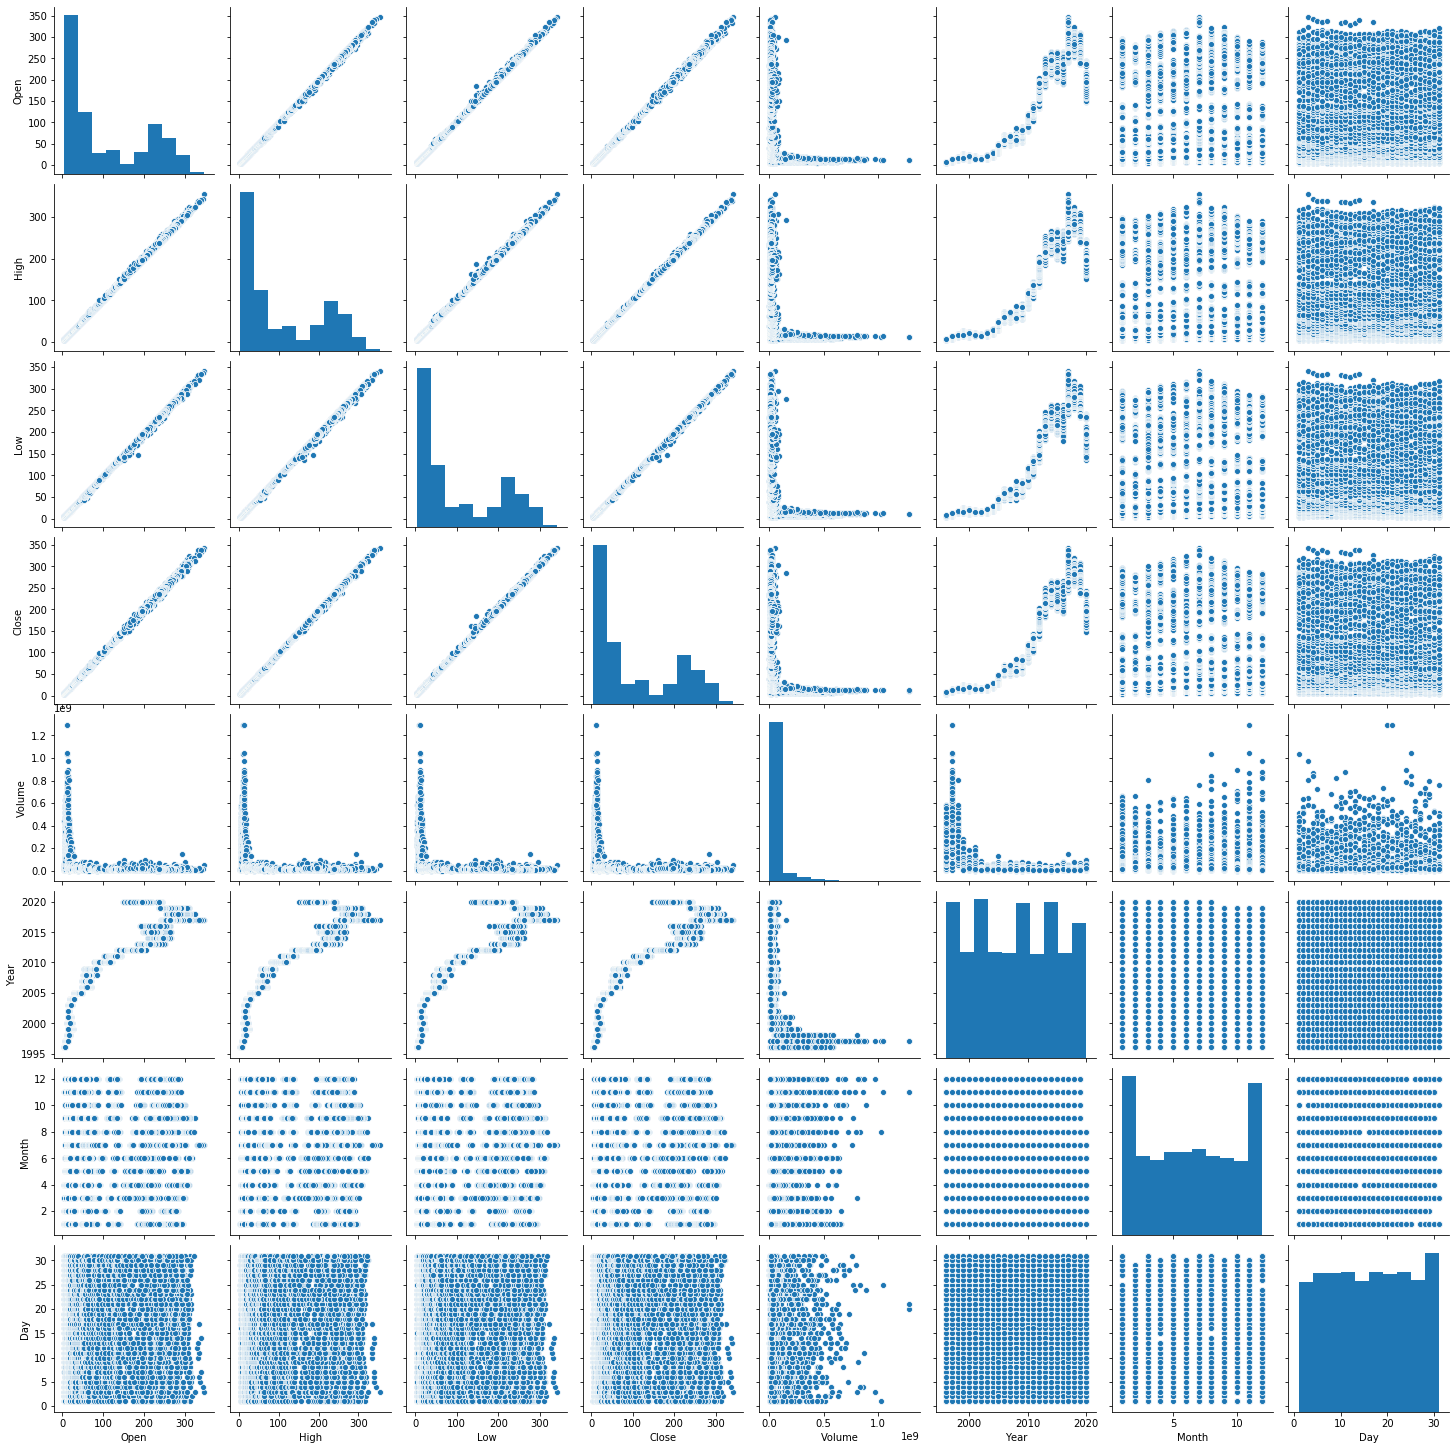

In [13]:
sns.pairplot(df)

In [14]:
df.corr()

,Open,High,Low,Close,Volume,Year,Month,Day
Open,1.000000,0.999885,0.999856,0.999769,-0.319967,0.927172,0.010335,0.002473
High,0.999885,1.000000,0.999824,0.999896,-0.319874,0.927739,0.009691,0.002952
Low,0.999856,0.999824,1.000000,0.999887,-0.319853,0.926437,0.010358,0.002508
Close,0.999769,0.999896,0.999887,1.000000,-0.319873,0.927087,0.009860,0.003052
Volume,-0.319967,-0.319874,-0.319853,-0.319873,1.000000,-0.469727,0.028526,-0.001563
Year,0.927172,0.927739,0.926437,0.927087,-0.469727,1.000000,-0.030510,0.000874
Month,0.010335,0.009691,0.010358,0.009860,0.028526,-0.030510,1.000000,0.008572
Day,0.002473,0.002952,0.002508,0.003052,-0.001563,0.000874,0.008572,1.000000


In [15]:
df.corr()>0.90

,Open,High,Low,Close,Volume,Year,Month,Day
Open,True,True,True,True,False,True,False,False
High,True,True,True,True,False,True,False,False
Low,True,True,True,True,False,True,False,False
Close,True,True,True,True,False,True,False,False
Volume,False,False,False,False,True,False,False,False
Year,True,True,True,True,False,True,False,False
Month,False,False,False,False,False,False,True,False
Day,False,False,False,False,False,False,False,True


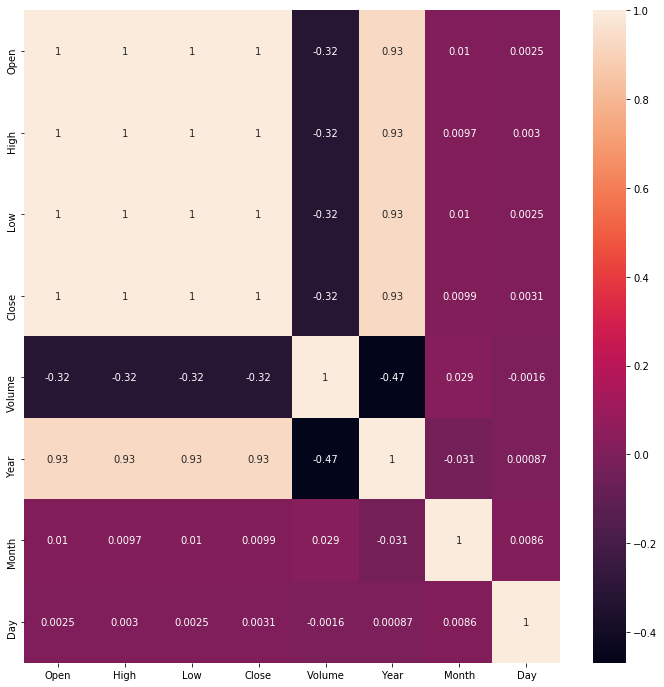

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [17]:
X = df.drop('Close',axis=1)
y = df['Close']

In [18]:
X.head(2)

,Open,High,Low,Volume,Year,Month,Day
0,5.55000,5.60000,5.53333,985500.0,1996,1,1
1,5.46667,5.56667,5.28889,7470000.0,1996,1,2


In [19]:
y.head(2)

0    5.58333
1    5.37222
Name: Close, dtype: float64

In [20]:
max(y)

342.5

In [21]:
min(y)

4.18222

In [22]:
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor

In [23]:
etr = ExtraTreesRegressor()

In [24]:
etr.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [25]:
etr.feature_importances_

array([3.61531379e-01, 2.69609072e-01, 2.34225776e-01, 2.25854540e-05,
       1.34566324e-01, 2.98986211e-05, 1.49649975e-05])

In [26]:
imp_features = pd.Series(data=etr.feature_importances_,index=X.columns)

In [27]:
imp_features

Open      0.361531
High      0.269609
Low       0.234226
Volume    0.000023
Year      0.134566
Month     0.000030
Day       0.000015
dtype: float64

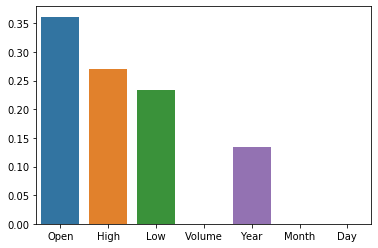

In [28]:
sns.barplot(y=etr.feature_importances_,x=X.columns)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
np.linspace(100,1000,10)

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000.])

In [33]:
n_estimator = [i for i in np.linspace(100,1000,10)]

In [34]:
param = {'n_estimators':n_estimator}

In [46]:
X_test.columns

Index(['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day'], dtype='object')

In [35]:
rfr = RandomForestRegressor(n_estimators=200)

In [36]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [37]:
pred = rfr.predict(X_test)

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          2.,   2.,   5.,   3.,   5.,   8.,   9.,   7.,  18.,  25.,  25.,
         48.,  63.,  68., 102., 199., 664., 278., 136.,  87.,  67.,  46.,
         45.,  22.,  17.,  10.,  12.,   8.,   3.,   3.,   1.,   3.,   1.,
          0.,   2.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,
          1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-7.57854015, -7.30479487, -7.03104959, -6.75730431, -6.48355903,
        -6.20981375, -5.93606847, -5.66232319, -5.38857791, -5.11483264,
        -4.84108736, -4.56734208, -4.2935968 , -4.01985152, -3.74610624,
        -3.47236096, -3.19861568, -2.92487041, -2.65112513, -2.37737985,
        -2.10363457, -1.82

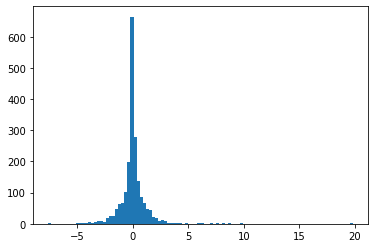

In [38]:
plt.hist((y_test-pred),bins=100)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
mean_absolute_error(y_test,pred)

0.6563952175398834

In [41]:
mean_squared_error(y_test,pred)

1.4298125593546052

In [42]:
import math
math.sqrt(mean_squared_error(y_test,pred))

1.195747698870713

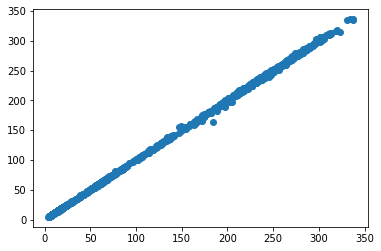

In [43]:
plt.scatter(y_test,pred)

In [44]:
import pickle

In [45]:
file_out = open('ITC_Stock_Price.pkl','wb')
pickle.dump(rfr,file_out)
file_out.close()